In [1]:
!pip install spotipy nltk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Kajal
[nltk_data]     Rathod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib


In [6]:
# Load your dataset
df = pd.read_csv(r'C:\Users\Kajal Rathod\OneDrive\Desktop\Sentiment_Analysis\ml_model\english_hindi_songs_with_features.csv')

# Display the first few rows of the dataset
print(df.head())


                                          track_name          artist  \
0                       Pop like this Pt. 2 - Slowed  prodbycpkshawn   
1  Popular (with Playboi Carti & Madonna) - From ...      The Weeknd   
2                                Pop like this Pt. 2  prodbycpkshawn   
3                           Pop Out (feat. Lil Tjay)          Polo G   
4                       Pop like this Pt. 2 - Slowed  prodbycpkshawn   

                                          album release_date  \
0                  Pop like this Pt. 2 (Slowed)   2024-06-01   
1  Popular (Music from the HBO Original Series)   2023-06-02   
2                           Pop like this Pt. 2   2024-05-29   
3                                  Die A Legend   2019-06-07   
4                  Pop like this Pt. 2 (Slowed)   2024-05-29   

                            spotify_uri language  danceability  energy  \
0  spotify:track:4bt3S3Tqh5pvs33y9RlF8J  English         0.772   0.423   
1  spotify:track:6WzRpISELf3YglGAh

In [7]:
def assign_mood(row):
    if row['energy'] > 0.7 and row['valence'] > 0.7:
        return 'happy'
    elif row['energy'] < 0.4 and row['valence'] < 0.4:
        return 'sad'
    elif row['energy'] > 0.7 and row['valence'] > 0.5:
        return 'excited'
    elif row['energy'] > 0.5 and row['valence'] > 0.6:
        return 'romantic'
    elif row['energy'] > 0.6:
        return 'dancing'
    elif row['energy'] > 0.7 and row['tempo'] > 120:
        return 'workout'
    else:
        return 'tired'


In [8]:
# Apply the function to create a new 'mood' column
df['mood'] = df.apply(assign_mood, axis=1)

# Display the updated dataframe
print(df[['track_name', 'artist', 'mood']].head())


                                          track_name          artist      mood
0                       Pop like this Pt. 2 - Slowed  prodbycpkshawn     tired
1  Popular (with Playboi Carti & Madonna) - From ...      The Weeknd  romantic
2                                Pop like this Pt. 2  prodbycpkshawn     tired
3                           Pop Out (feat. Lil Tjay)          Polo G   dancing
4                       Pop like this Pt. 2 - Slowed  prodbycpkshawn     tired


In [9]:
# Prepare features (X) and labels (y)
X = df[['danceability', 'energy', 'valence', 'tempo', 'speechiness', 'acousticness']]
y = df['mood']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Save the trained model
joblib.dump(model, 'song_recommendation_model.pkl')


              precision    recall  f1-score   support

     dancing       1.00      1.00      1.00         7
     excited       1.00      1.00      1.00         7
       happy       1.00      1.00      1.00        10
    romantic       0.83      1.00      0.91         5
         sad       1.00      0.83      0.91         6
       tired       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



['song_recommendation_model.pkl']

In [11]:
import joblib

# Load the trained model
model = joblib.load('song_recommendation_model.pkl')

# Example new song's features, formatted as a 2D array (replace with actual values)
new_song_features = [[0.8, 0.9, 0.8, 125, 0.4, 0.3]]  # Replace with actual song features

# Predict the mood for the new song
new_prediction = model.predict(new_song_features)

# Print the predicted mood
print(f'Predicted Mood for the new song: {new_prediction[0]}')


Predicted Mood for the new song: happy


C:\Users\Kajal Rathod\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
def recommend_songs_based_on_mood(mood_input, df):
    # Filter the dataframe to find songs with the same mood
    filtered_songs = df[df['mood'] == mood_input]

    if not filtered_songs.empty:
        return filtered_songs[['track_name', 'artist', 'spotify_uri']].head()
    else:
        return "No songs found for this mood."
    
# Example input
mood_input = "happy"  # This will come from the user
recommended_songs = recommend_songs_based_on_mood(mood_input, df)

print(recommended_songs)

                               track_name           artist  \
10                              Pop Muzik                M   
14                              Pop Rocks  Cherry Hencefox   
18  Poppin' My Collar (feat. Project Pat)    Three 6 Mafia   
28                    Poppin' Them Thangs           G-Unit   
37                                    Pop           *NSYNC   

                             spotify_uri  
10  spotify:track:6z3HAUZpAyJ0ctsbAwAiw3  
14  spotify:track:2s7CHkCAkTKVPhRWiPcOa6  
18  spotify:track:5zd9TgduWbfFXwgnm3K3Rz  
28  spotify:track:4E5IFAXCob6QqZaJMTw5YN  
37  spotify:track:0Jc8qF1mUPo1A96HE9QxZz  


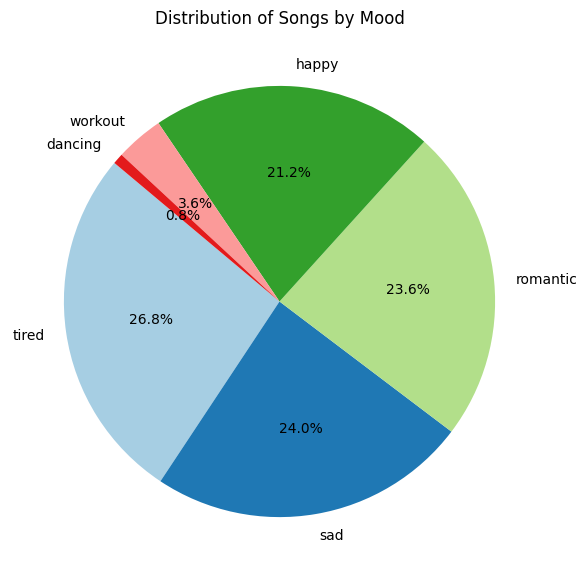

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv('english_hindi_songs_with_features.csv')

# Define your mood classification logic (including dancing mood)
def classify_mood(row):
    if row['energy'] > 0.7 and row['valence'] > 0.7:
        return 'happy'
    elif row['valence'] < 0.3:
        return 'sad'
    elif row['energy'] > 0.6 and row['valence'] > 0.5:
        return 'romantic'
    elif row['energy'] > 0.8 and row['valence'] > 0.5:
        return 'excited'
    elif row['energy'] > 0.6 and row['tempo'] > 120:
        return 'workout'
    elif row['energy'] > 0.6 and 100 <= row['tempo'] <= 120:
        return 'dancing'
    else:
        return 'tired'

# Apply the mood classification function to the dataset
df['mood'] = df.apply(classify_mood, axis=1)

# Count the number of songs for each mood
mood_counts = df['mood'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(mood_counts, labels=mood_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Songs by Mood")
plt.show()



In [23]:
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
# import pandas as pd
# import time
# from tabulate import tabulate  # Import tabulate for better display

# # Spotify API credentials
# client_id = '1b9ae89ffb85423fa3d5dedb4c0605d9'
# client_secret = '5e481f9acfb340ff94233b4c47f3336e'

# # Authenticate with Spotify API
# auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
# sp = spotipy.Spotify(auth_manager=auth_manager)

# # Function to search for tracks and retrieve song details + audio features
# def get_tracks(query, language, limit=50):
#     try:
#         results = sp.search(q=query, type='track', limit=limit)
#         tracks = results['tracks']['items']
        
#         track_data = []
#         for track in tracks:
#             track_info = {
#                 'track_name': track['name'],
#                 'artist': track['artists'][0]['name'],
#                 'album': track['album']['name'],
#                 'release_date': track['album']['release_date'],
#                 'spotify_uri': track['uri'],  # Add Spotify URI link
#                 'language': language  # Specify language passed as parameter
#             }
#             # Get audio features such as danceability, energy, valence, etc.
#             features = sp.audio_features(track['id'])[0]
#             if features:  # Ensure the track has audio features
#                 track_info.update({
#                     'danceability': features['danceability'],
#                     'energy': features['energy'],
#                     'valence': features['valence'],
#                     'tempo': features['tempo'],
#                     'speechiness': features['speechiness'],
#                     'acousticness': features['acousticness']
#                 })
#                 track_data.append(track_info)
#             time.sleep(0.1)  # Add a short delay to avoid rate limiting
        
#         return track_data

#     except Exception as e:
#         print(f"Error fetching tracks: {e}")
#         return []

# # Fetch English songs using different queries
# english_pop = get_tracks("Pop", language="English", limit=50)
# english_rock = get_tracks("Rock", language="English", limit=50)
# english_hiphop = get_tracks("Hip-Hop", language="English", limit=50)

# # Fetch Hindi songs using different queries
# hindi_bollywood = get_tracks("Bollywood", language="Hindi", limit=50)
# hindi_classical = get_tracks("Hindi Classical", language="Hindi", limit=50)

# # Combine all tracks data into a single list
# all_tracks = english_pop + english_rock + english_hiphop + hindi_bollywood + hindi_classical

# # Convert the combined list to a DataFrame
# df = pd.DataFrame(all_tracks)

# # Save the DataFrame as a CSV file
# df.to_csv('english_hindi_songs_with_features.csv', index=False)

# # Print the dataset in a table format using tabulate
# print(tabulate(df.head(10), headers='keys', tablefmt='grid'))  # Shows the first 10 rows in a table with borders


In [10]:
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
# import pandas as pd
# from textblob import TextBlob
# from tabulate import tabulate
# import webbrowser  # To open the song link directly

# # Load the dataset created earlier
# df = pd.read_csv('english_hindi_songs_with_features.csv')

# # Function to analyze mood based on user input
# def get_user_mood(input_text):
#     blob = TextBlob(input_text)
#     sentiment_score = blob.sentiment.polarity
    
#     if sentiment_score > 0.5:
#         return "happy"
#     elif 0 < sentiment_score <= 0.5:
#         return "positive"
#     elif sentiment_score == 0:
#         return "neutral"
#     elif -0.5 <= sentiment_score < 0:
#         return "negative"
#     else:
#         return "sad"

# # Function to recommend songs based on the mood
# def recommend_songs_based_on_mood(df, mood, num_songs=5):
#     if mood == "happy":
#         # High energy, high danceability for happy mood
#         recommended_songs = df[(df['danceability'] > 0.6) & (df['energy'] > 0.6)]
#     elif mood == "sad":
#         # Low energy, high acousticness for sad mood
#         recommended_songs = df[(df['energy'] < 0.5) & (df['acousticness'] > 0.5)]
#     elif mood == "excited":
#         # High tempo, high energy for excited mood
#         recommended_songs = df[(df['tempo'] > 120) & (df['energy'] > 0.7)]
#     elif mood == "nervous":
#         # Mid-tempo, high valence for nervous (calming effect)
#         recommended_songs = df[(df['tempo'] < 100) & (df['valence'] > 0.5)]
#     elif mood == "workout" or mood == "energy":
#         # High energy, high tempo for workout/energy mood
#         recommended_songs = df[(df['energy'] > 0.7) & (df['tempo'] > 130)]
#     elif mood == "romantic":
#         # High valence, high acousticness for romantic mood
#         recommended_songs = df[(df['valence'] > 0.5) & (df['acousticness'] > 0.5)]
#     else:
#         # Default balanced songs for neutral mood
#         recommended_songs = df[(df['valence'] > 0.4) & (df['energy'] > 0.4)]
    
#     # Split into Hindi and English
#     hindi_songs = recommended_songs[recommended_songs['language'] == 'Hindi']
#     english_songs = recommended_songs[recommended_songs['language'] == 'English']

#     # Select 5 songs from each language category
#     selected_hindi = hindi_songs.sample(n=min(5, len(hindi_songs))) if len(hindi_songs) >= 5 else hindi_songs
#     selected_english = english_songs.sample(n=min(5, len(english_songs))) if len(english_songs) >= 5 else english_songs

#     # Combine the selected songs
#     final_recommendations = pd.concat([selected_hindi, selected_english])

#     return final_recommendations


# # Ask the user for their mood
# user_input = input("How are you feeling today? ")

# # Get the user's mood
# user_mood = get_user_mood(user_input)
# print(f"\nDetected mood: {user_mood.capitalize()}")

# # Get song recommendations based on mood
# recommended_songs = recommend_songs_based_on_mood(df, user_mood, num_songs=5)

# # Print the song recommendations in a tabular format with Spotify links
# if len(recommended_songs) > 0:
#     print("\nHere are some song recommendations for you:")
#     # Create a Spotify link column using the spotify_uri
#     recommended_songs['spotify_link'] = "https://open.spotify.com/track/" + recommended_songs['spotify_uri'].str.split(':').str[-1]
    
#     # Display the recommendations in a tabular format using 'tabulate'
#     print(tabulate(recommended_songs[['track_name', 'album', 'artist', 'language', 'spotify_link']], headers='keys', tablefmt='grid'))

#     # Optional: Automatically open the first song's link in the default web browser
#     first_song_link = recommended_songs.iloc[0]['spotify_link']
#     webbrowser.open(first_song_link)

# else:
#     print("Sorry, no songs found for your mood.")


In [11]:
# import pandas as pd
# import json

# # Load the dataset
# df = pd.read_csv('english_hindi_songs_with_features.csv')

# # Function to analyze mood and recommend songs (the same as your existing logic)
# def recommend_songs(mood):
#     # Your recommendation logic here
#     # ...

#     # For simplicity, let's create a mock result
#     recommendations = [
#         {"track_name": "Song 1", "album": "Album 1", "artist": "Artist 1", "spotify_link": "https://open.spotify.com/track/1"},
#         {"track_name": "Song 2", "album": "Album 2", "artist": "Artist 2", "spotify_link": "https://open.spotify.com/track/2"}
#     ]

#     # Return the result as JSON
#     print(json.dumps(recommendations))

# # Get the user input (mood) passed from Node.js
# import sys
# user_mood = sys.argv[1]

# # Get recommendations
# recommend_songs(user_mood)


In [ ]:
# dataset, vocab, max_len = [], set(), 0

# # Preprocess the dataset by the specific IAM_Words dataset file structure
# words = open(stow.join(dataset_path, "words.txt"), "r").readlines()
# for line in tqdm(words):
#     if line.startswith("#"):
#         continue

#     line_split = line.split(" ")
#     if line_split[1] == "err":
#         continue

#     folder1 = line_split[0][:3]
#     folder2 = line_split[0][:8]
#     file_name = line_split[0] + ".png"
#     label = line_split[-1].rstrip('\n')

#     rel_path = stow.join(dataset_path, "words", folder1, folder2, file_name)
#     if not stow.exists(rel_path):
#         continue

#     dataset.append([rel_path, label])
#     vocab.update(list(label))
#     max_len = max(max_len, len(label))